In [1]:
from model import FFNet, tv_model
from learning import Learn, Selector
from dataset import SKDS, TVDS, CDataset

from torch.optim import Adam
from torch.nn import MSELoss, CrossEntropyLoss
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms


In [ ]:
import numpy as np

class Dummy(CDataset):
    
    def load_data(self, boom='bust'):
        data = {1: (np.asarray([1,2,3,4]), np.asarray(100), ['apple','dog']),
                2: (np.asarray([5,6,7,8]), np.asarray(200), ['orange','cat'])}
        print(boom)
        return data
    
ds_params = {'train_params': {'embed': [('fruit',2,8,False,False),
                                        ('pet',2,8,False,False)],
                              'embed_lookup': {'fruit': {'apple': 1,
                                                         'orange': 2},
                                               'pet': {'dog': 1,
                                                       'cat': 2}},
             'boom': 'bang'}}
    
d = Dummy(**ds_params['train_params'])
d[1]           

SKDS created...
splits:  (0.7, 0.15)
CModel loaded...
FFNet model loaded...
epoch: 0 of 10, train loss: 10231.988254123264, val loss: 1260.6125, lr: 0.01
epoch: 1 of 10, train loss: 1280.186093930845, val loss: 1118.3141479492188, lr: 0.01
epoch: 2 of 10, train loss: 887.8908781828703, val loss: 731.3146606445313, lr: 0.01
epoch: 3 of 10, train loss: 824.2763151945891, val loss: 707.0494873046875, lr: 0.01
epoch: 4 of 10, train loss: 793.2885041413484, val loss: 690.19443359375, lr: 0.01
epoch: 5 of 10, train loss: 906.4373937536169, val loss: 928.6276489257813, lr: 0.01
epoch: 6 of 10, train loss: 840.6229756673177, val loss: 736.7093505859375, lr: 0.01
epoch: 7 of 10, train loss: 834.778795030382, val loss: 782.426708984375, lr: 0.01
epoch: 8 of 10, train loss: 874.2097891348379, val loss: 909.1131469726563, lr: 0.01
epoch: 9 of 10, train loss: 761.2953016493055, val loss: 598.5902648925781, lr: 0.01
test loss: 704.4905751546224
y_pred:
tensor([[-322.9699],
        [   2.3887],
     

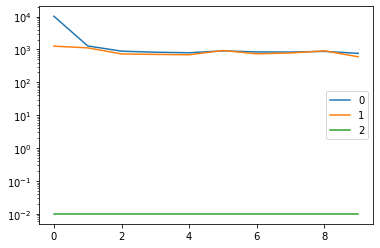

learning time: 0:00:07.784367


In [2]:
model_params = {'D_in': 128, 
                'H': 512, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'embed': [],
                              'make': 'make_regression',
                              'transform': None,
                              'target_transform': None,
                              'sk_params': {'n_samples': 10000,
                                            'n_features': 128}}}
             
                           
             
opt_params = {'lr': 0.01}
crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}
sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 5}


l = Learn([SKDS], FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=MSELoss,
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=256, epochs=10)

TVDS created...
TVDS created...
splits:  (0.8,)
TorchVision model resnet18 loaded...
epoch: 0 of 2, train loss: 0.2801192058020582, val loss: 0.07544719376775591, lr: 0.01
epoch: 1 of 2, train loss: 0.06518800460112592, val loss: 0.0484572744185608, lr: 0.01
test loss: 0.03378179720358235
y_pred:
tensor([[ 1.4660e+00,  1.1557e+01, -6.4028e-01, -5.3195e+00,  1.0744e+00,
         -2.6726e+00,  2.4110e-01,  1.3367e+00, -3.2121e-01, -2.3171e+00],
        [-1.2705e+00,  1.5302e+00,  9.1800e+00,  8.1807e-01, -1.5763e+00,
         -4.2784e+00, -6.6550e+00,  6.2404e+00,  2.4505e-01, -1.9811e+00],
        [-6.2735e+00,  9.7608e-01,  8.3680e-01,  1.0586e+01, -2.1671e+00,
         -1.4148e-01, -8.1790e+00,  2.6525e+00,  1.7758e+00,  9.3155e-01],
        [-3.8148e+00, -5.2848e+00, -3.4976e+00, -4.3870e+00,  1.2835e+01,
         -2.0019e+00, -4.2722e+00,  1.2478e+00, -2.5456e+00,  2.6046e+00],
        [-1.5182e+00, -6.9154e+00, -5.1636e+00,  6.5975e+00, -5.9566e+00,
          1.8256e+01, -6.4398e-0

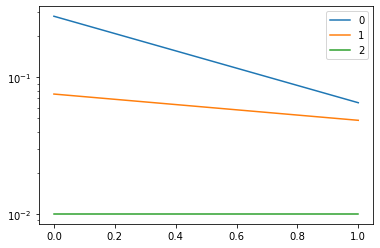

learning time: 0:04:03.377312


In [4]:
model_params = {'model_name': 'resnet18',
                'in_channels': 1,
                'tv_params': {'num_classes': 10}}

ds_params={'train_params': {'embed': [],
                            'dataset': 'MNIST',
                            'tv_params': {'root': './data/',
                                          'train': True,
                                          'download': True,
                                          'transform': transforms.Compose([
                                                           transforms.Resize(224),
                                                           transforms.ToTensor()]),
                                          'target_transform': None}},
           'test_params': {'embed': [],
                           'dataset': 'MNIST',
                           'tv_params': {'root': './data/',
                                         'train': False,
                                         'download': True,
                                         'transform': transforms.Compose([
                                                         transforms.Resize(224),
                                                         transforms.ToTensor()]),
                                         'target_transform': None}}}
        
opt_params = {'lr': 0.01}
crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.8,)}
sched_params = {'factor': .5,
                'patience': 1,
                'cooldown': 1}

l = Learn([TVDS,TVDS], tv_model, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=64, epochs=2)